In [1]:
MAKE_BOOK_FIGURES=Trueimport numpy as npimport scipy.stats as stimport matplotlib as mplimport matplotlib.pyplot as plt%matplotlib inlineimport matplotlib_inlinematplotlib_inline.backend_inline.set_matplotlib_formats('svg')import seaborn as snssns.set_context("paper")sns.set_style("ticks")def set_book_style():    plt.style.use('seaborn-v0_8-white')     sns.set_style("ticks")    sns.set_palette("deep")    mpl.rcParams.update({        # Font settings        'font.family': 'serif',  # For academic publishing        'font.size': 8,  # As requested, 10pt font        'axes.labelsize': 8,        'axes.titlesize': 8,        'xtick.labelsize': 7,  # Slightly smaller for better readability        'ytick.labelsize': 7,        'legend.fontsize': 7,                # Line and marker settings for consistency        'axes.linewidth': 0.5,        'grid.linewidth': 0.5,        'lines.linewidth': 1.0,        'lines.markersize': 4,                # Layout to prevent clipped labels        'figure.constrained_layout.use': True,                # Default DPI (will override when saving)        'figure.dpi': 600,        'savefig.dpi': 600,                # Despine - remove top and right spines        'axes.spines.top': False,        'axes.spines.right': False,                # Remove legend frame        'legend.frameon': False,                # Additional trim settings        'figure.autolayout': True,  # Alternative to constrained_layout        'savefig.bbox': 'tight',    # Trim when saving        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off    })def set_notebook_style():    plt.style.use('seaborn-v0_8-white')    sns.set_style("ticks")    sns.set_palette("deep")    mpl.rcParams.update({        # Font settings - using default sizes        'font.family': 'serif',        'axes.labelsize': 10,        'axes.titlesize': 10,        'xtick.labelsize': 9,        'ytick.labelsize': 9,        'legend.fontsize': 9,                # Line and marker settings        'axes.linewidth': 0.5,        'grid.linewidth': 0.5,        'lines.linewidth': 1.0,        'lines.markersize': 4,                # Layout settings        'figure.constrained_layout.use': True,                # Remove only top and right spines        'axes.spines.top': False,        'axes.spines.right': False,                # Remove legend frame        'legend.frameon': False,                # Additional settings        'figure.autolayout': True,        'savefig.bbox': 'tight',        'savefig.pad_inches': 0.1    })def save_for_book(fig, filename, is_vector=True, **kwargs):    """    Save a figure with book-optimized settings.        Parameters:    -----------    fig : matplotlib figure        The figure to save    filename : str        Filename without extension    is_vector : bool        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.    **kwargs : dict        Additional kwargs to pass to savefig    """        # Set appropriate DPI and format based on figure type    if is_vector:        dpi = 1000        ext = '.pdf'    else:        dpi = 600        ext = '.tif'        # Save the figure with book settings    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)def make_full_width_fig():    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)def make_half_width_fig():    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)if MAKE_BOOK_FIGURES:    set_book_style()else:    set_notebook_style()make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

(multivariate-normal-full-covariance)=
# The Multivariate Normal - Full Covariance Case

Consider the $N$-dimensional multivariate normal:

$$
\mathbf{X} \sim N\left(\boldsymbol{\mu}, \boldsymbol{\Sigma}\right),
$$

where $\boldsymbol{\mu}$ is a $N$-dimensional vector, $\boldsymbol{\Sigma}$ is a *positive-definite matrix*.

```{admonition} What is a positive-definite matrix?
:class: dropdown

A positive-definite matrix is a symmetric matrix $\boldsymbol{\Sigma}$ such that for any non-zero vector $\mathbf{v}$, $\mathbf{v}^T \boldsymbol{\Sigma} \mathbf{v} > 0$.

A positive-definite matrix is invertible, and its inverse is also positive-definite.
Also, the eigenvalues of a positive-definite matrix are all positive.
Since the determinant of a matrix is the product of its eigenvalues, the determinant of a positive-definite matrix is positive.
And the eigenvectors of a positive-definite matrix are all orthogonal.
```

The joint PDF of $\mathbf{X}$ is

$$
p(\mathbf{x}) = \frac{1}{\sqrt{\left(2\pi\right)^N \det\left(\boldsymbol{\Sigma}\right)}} \exp\left(-\frac{1}{2} \left(\mathbf{x} - \boldsymbol{\mu}\right)^T \boldsymbol{\Sigma}^{-1} \left(\mathbf{x} - \boldsymbol{\mu}\right)\right).
$$

The term $\det\left(\boldsymbol{\Sigma}\right)$ is the *determinant* of $\boldsymbol{\Sigma}$.
Sometimes we write $\left|\boldsymbol{\Sigma}\right|$ instead of $\det\left(\boldsymbol{\Sigma}\right)$.
Because $\boldsymbol{\Sigma}$ is positive-definite, $\det\left(\boldsymbol{\Sigma}\right)$ is positive so that we can take the square root.

The term $\boldsymbol{\Sigma}^{-1}$ is the *inverse* of $\boldsymbol{\Sigma}$.
It exists because $\boldsymbol{\Sigma}$ is positive-definite.
And it is also positive-definite.
So the term $\left(\mathbf{x} - \boldsymbol{\mu}\right)^T \boldsymbol{\Sigma}^{-1} \left(\mathbf{x} - \boldsymbol{\mu}\right)$ is a positive quantity.
You can also show that it has a minimum at $\mathbf{x} = \boldsymbol{\mu}$.

The vector $\boldsymbol{\mu}$ is the *mean vector*, because it is the expected value of $\mathbf{X}$,

$$
\mathbb{E}\left[\mathbf{X}\right] = \boldsymbol{\mu}.
$$

The matrix $\boldsymbol{\Sigma}$ is the *covariance matrix*, because it is the (self-)covariance of $\mathbf{X}$,

$$
\mathbb{C}\left[\mathbf{X}\right] = \mathbb{C}\left[\mathbf{X}, \mathbf{X}\right] = \boldsymbol{\Sigma}.
$$

Let's plot contours and take samples.

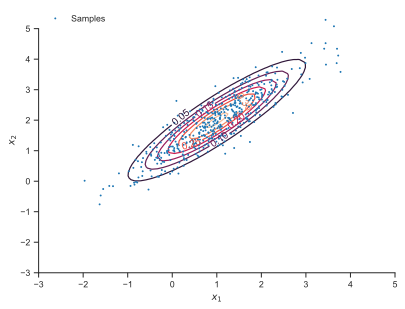

In [8]:
import numpy as np
import scipy.stats as st

# The mean vector
mu = np.array([1.0, 2.0])
# The covariance matrix
Sigma = np.array(
    [
        [1.0, 0.9],
        [0.9, 1.0]
    ]
)
# The multivariate normal random vector
X = st.multivariate_normal(mean=mu, cov=Sigma)

# CONTOURS
fig, ax = plt.subplots(dpi=150)
x1 = np.linspace(-3, 5, 64)
x2 = np.linspace(-3, 5, 64)
X1, X2 = np.meshgrid(x1, x2)
X_flat = np.hstack(
    [
        X1.flatten()[:, None],
        X2.flatten()[:, None]
    ]
)
# PDF values
pdf_X = X.pdf(X_flat).reshape(X1.shape)
c = ax.contour(X1, X2, pdf_X)
ax.clabel(c, inline=1, fontsize=10)

# SAMPLES
num_samples = 500
x_samples = X.rvs(size=num_samples)
ax.plot(
    x_samples[:, 0],
    x_samples[:, 1],
    '.',
    markersize=2,
    label='Samples'
)
plt.legend(loc='best', frameon=False)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
sns.despine(trim=True);

## Questions
+ Rerun the steps above after moving $\boldsymbol{\mu}$ to $(0, 1)$. Observe how the contours of the PDF move.
+ Rerun the steps above for $\Sigma_{12} = \Sigma_{21} = 0.1$. Observe how the contours of the PDF change.
+ Rerun the steps above for $\Sigma_{12} = \Sigma_{21} = -0.9$. Observe how the contours of the PDF change.
+ Rerun the steps above for $\Sigma_{11} = 0.4$. Why does the code fail?

## The covariance matrix must be positive definite so that $p(\mathbf{x})$ has a well-defined, unique maximum

We said that because the covariance matrix $\boldsymbol{\Sigma}$ is positive definite, the PDF of $\mathbf{X}$ has a unique maximum. Let's try to understand this step by step.

First, let us numerically examine what positive definiteness means.
We take two matrices. One will be positive definite; the other won't be.
We will draw random vectors $v$, evaluate the expression $\mathbf{v}^T\boldsymbol{\Sigma}\mathbf{v}$, and see what I get.

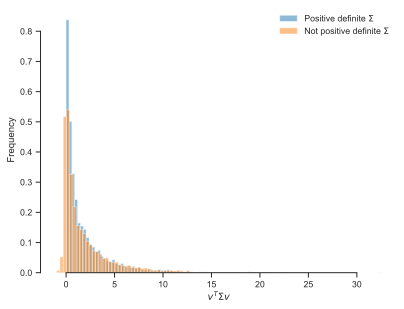

In [27]:
# A covariane matrix that we know works
Sigma_good = np.array(
    [
        [1.0, 0.9],
        [0.9, 1.0]
    ]
)

# A covariance matrix that we know does not work
Sigma_bad = np.array(
    [
        [1, 1.1],
        [1.1, 1.0]
    ]
)

# Take random vectors and compute at quantity
num_vectors = 5000
Q_good = np.ndarray((num_vectors,))
Q_bad = np.ndarray((num_vectors,))
for i in range(num_vectors):
    v = np.random.randn(2)
    Q_good[i] = v @ (Sigma_good @ v)
    Q_bad[i] = v @ (Sigma_bad @ v)

# Let's do the histograms of these quantities to see whether or not they are positive
fig, ax = plt.subplots()
ax.hist(
    Q_good,
    density=True,
    alpha=0.5,
    bins=100,
    label='Positive definite $\Sigma$'
)
ax.hist(
    Q_bad,
    density=True,
    alpha=0.5,
    bins=100,
    label='Not positive definite $\Sigma$'
)
ax.set_xlabel(r'$v^T\Sigma v$')
ax.set_ylabel('Frequency')
plt.legend(loc='best', frameon=False)
sns.despine(trim=True);

Please observe that the non-positive definite matrix gives us several negative values.

Is there a way to check if a matrix is positive definite without doing this random test?
Yes, you check if all the eigenvalues of the matrix are positive. Here is how:

In [9]:
print("Eigenvalues of Sigma_good", np.linalg.eigh(Sigma_good)[0])
print("Eigenvalues of Sigma_bad", np.linalg.eigh(Sigma_bad)[0])

Eigenvalues of Sigma_good [0.1 1.9]
Eigenvalues of Sigma_bad [-0.2486833  1.6486833]


And you see that the second one has a negative eigenvalue.

Finally, let's visualize the probability density contour and see with our eyes that it does not have a unique minimum when the matrix $\boldsymbol{\Sigma}$ is not positive definite.

First, I define the PDF:

In [28]:
def pdf_mvn(x, mu, Sigma):
    """Compute the PDF of the multivariate Gaussian in a way that does not require
    Sigma to be positive definite, so that you can see what happens.
    
    Just keep in mind that this is not computationally efficient (or stable),
    but it is okay for this example.
    
    Arguments
    x     -- A 1D numpy array.
    mu    -- The mean vector.
    Sigma -- The covariance matrix.
    """
    N = Sigma.shape[0]
    return np.exp(
        -0.5 * N * np.log(2.0 * np.pi)
        - 0.5 * np.linalg.det(Sigma)
        - 0.5 * (x - mu) @ np.linalg.inv(Sigma) @ (x - mu)
    )

You can evaluate the array PDF at a point like this:

In [29]:
pdf_mvn(np.array([0.5, 0.6]), mu, Sigma)

0.011880260158671472

To do the contour, we have to evaluate the PDF at many points.
We can do this with a for loop.
But we can also [vectorize](https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html) our function:

In [30]:
vpdf_mvn = np.vectorize(
    pdf_mvn,
    excluded=[1, 2],
    signature="(n)->()"
)

In the above, `exclude` ensures that inputs 1 (`mu`) and 2 (`Sigma`) are not vectorized.
The `signature` tells numpy that the `log_pdf_mv` function accepts a 1D array and returns a scalar.
Vectorization returns the function `vlog_pdf_mv` that acts on 2D arrays.
Each row corresponds to a different $\mathbf{X}$ sample.
Here is how:

In [31]:
vpdf_mvn(
    np.array(
        [
            [0.5, 0.6],
            [-0.1, 0.3],
            [1.5, -1.5]
        ]
    ),
    mu,
    Sigma
)

array([1.18802602e-02, 2.09743291e-02, 1.88142445e-19])

And now I can do the contour:

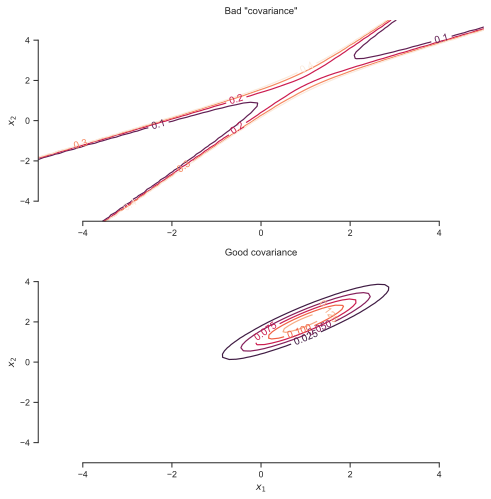

In [45]:
x1 = np.linspace(-5, 5, 64)
x2 = np.linspace(-5, 5, 64)
X1, X2 = np.meshgrid(x1, x2)
X_flat = np.hstack(
    [
        X1.flatten()[:, None],
        X2.flatten()[:, None]
    ]
)

Z_bad = vpdf_mvn(
    X_flat,
    mu,
    Sigma_bad
).reshape(X1.shape)

Z_good = vpdf_mvn(
    X_flat,
    mu,
    Sigma_good
).reshape(X1.shape)

fig, ax = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(8, 8)
)
c = ax[0].contour(
    X1,
    X2,
    Z_bad,
    levels=np.linspace(0, 0.4, 5)
)
ax[0].clabel(c, inline=1, fontsize=10);
ax[0].set_title("Bad \"covariance\"")
c = ax[1].contour(
    X1,
    X2,
    Z_good,
    levels=5
)
ax[1].clabel(c, inline=1, fontsize=10);
ax[1].set_title("Good covariance")
ax[1].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[1].set_ylabel('$x_2$')
sns.despine(trim=True)

Notice that $\boldsymbol{\mu}$ is not a maximum of $\log p(\mathbf{x})$ but a saddle point. 

## Questions

+ Rerun the code above for $\Sigma_{12} = \Sigma_{21} = -0.9$ (both for the "good" and the "bad" covariance).

(sampling-multivariate-normal)=
## Sampling the multivariate normal with diagonal covariance using the standard normal

Let $\mathbf{Z}$ be a $N$-dimensional standard normal:

$$
\mathbf{Z} \sim N(0,\mathbf{I}),
$$

where $\mathbf{I}$ is the $N\times N$ unit matrix (all zeros except the diagonal, which is all ones).
Define the random vector $\mathbf{X}$ as:

$$
\mathbf{X} = \boldsymbol{\mu} + \mathbf{A}\mathbf{Z}.
$$

One can show that it is a multivariate normal:

$$
\mathbf{X} \sim N\left(\boldsymbol{\mu}, \boldsymbol{\Sigma})\right),
$$

with

$$
\boldsymbol{\Sigma} = \mathbf{A}\mathbf{A}^T.
$$

```{admonition} Proof
:class: dropdown

We can easily prove that $\mathbf{X}$ has the correct mean and covariance:

$$
\begin{align}
\mathbb{E}\left[\mathbf{X}\right] &= \mathbb{E}\left[\boldsymbol{\mu} + \mathbf{A}\mathbf{Z}\right] \\
&= \boldsymbol{\mu} + \mathbf{A}\mathbb{E}\left[\mathbf{Z}\right] \\
&= \boldsymbol{\mu} + \mathbf{A}\mathbf{0} \\
&= \boldsymbol{\mu}
\end{align}
$$

and

$$
\begin{align}
\mathrm{cov}\left[\mathbf{X}\right] &= \mathrm{cov}\left[\boldsymbol{\mu} + \mathbf{A}\mathbf{Z}\right] \\
&= \mathrm{cov}\left[\mathbf{A}\mathbf{Z}\right] \\
&= \mathbf{A}\mathrm{cov}\left[\mathbf{Z}\right]\mathbf{A}^T \\
&= \mathbf{A}\mathbf{I}\mathbf{A}^T \\
&= \mathbf{A}\mathbf{A}^T
\end{align}
$$

To show that it is indeed a multivariate normal, we need to show that the pdf of $\mathbf{X}$ has the right form.
This is a bit more involved, but it can be done using the [change of variables formula](https://en.wikipedia.org/wiki/Probability_density_function#Dependent_variables_and_change_of_variables_in_multiple_dimensions) and a trick called completing the square.

```

Such a matrix $\mathbf{A}$ is non-unique and is called a "square root" of $\boldsymbol{\Sigma}$.
The most commonly used square root of $\boldsymbol{\Sigma}$, however, is the [Cholesky](https://www.youtube.com/watch?v=TprfUB3nI8Y) (and pronounced KOLESKI not TSOLESKI or SHOLESKI -- at least by the people who taught me linear algebra!)
In the Cholesky decomposition, $\mathbf{A}$ is a lower triangular matrix (everything above the diagonal is zero), and the diagonal contains only positive numbers.

The above theorem is useful because it allows us to sample from a multivariate normal with diagonal covariance using the standard normal.
We go through the following steps:

1. Generate $N$ standard normal random variables $\mathbf{Z}$.
2. Multiply $\mathbf{Z}$ by the Cholesky decomposition of $\boldsymbol{\Sigma}$.
3. Add the mean $\boldsymbol{\mu}$.

Let's do this in Python.
First, let's find the Cholesky decomposition of $\boldsymbol{\Sigma}$:

In [47]:
# A covariane matrix that we know works
Sigma = np.array(
    [
        [1.0, 0.9],
        [0.9, 1.0]
    ]
)
A = np.linalg.cholesky(Sigma)
print("A =")
print(A)

A =
[[1.         0.        ]
 [0.9        0.43588989]]


In [48]:
# As a sanity check let's see if A * A.T gives us Sigma
print("A * A.T = ")
print(A @ A.T)
print("\nCompare to Sigma =")
print(Sigma)

A * A.T = 
[[1.  0.9]
 [0.9 1. ]]

Compare to Sigma =
[[1.  0.9]
 [0.9 1. ]]


Let's now verify that if we sample $\mathbf{Z}$ from $N(\mathbf{0},\mathbf{I})$ and evaluate $\mathbf{X} = \boldsymbol{\mu} + \mathbf{A}\mathbf{Z}$, then $\mathbf{X}$ will be distributed according to $N(\boldsymbol{\mu},\boldsymbol{\Sigma})$.

Let's write some code to take a single sample and then we will vectorize it.

In [49]:
def sample_mvn(mu, A):
    """Samples from a multivariate normal.
    
    Arguments
    mu -- The mean vector.
    A  -- The Cholesky decomposition of the covariance matrix.
    """
    z = np.random.randn(mu.shape[0])
    return mu + A @ z

Here is how it works:

In [50]:
for i in range(10):
    print(f"sample {i} = {sample_mvn(mu, A)}")

sample 0 = [-0.18890091  0.35159494]
sample 1 = [0.97453387 2.18909632]
sample 2 = [1.80830105 2.81649643]
sample 3 = [2.37771011 3.19377202]
sample 4 = [2.22812554 3.20392518]
sample 5 = [0.55014157 1.19822046]
sample 6 = [0.40626639 1.39052606]
sample 7 = [0.08688004 1.41870291]
sample 8 = [1.91221029 3.46608438]
sample 9 = [0.94520142 1.37631589]


Let's make a function that will help us take many samples at once:

In [51]:
def sample_many_mvn(size, mu, A):
    """Sample many times from a multivariate Normal.
    
    Arguments
    size -- The number of samples.
    mu   -- The mean vector.
    A    -- The Cholesky decomposition of the covariance matrix.
    """
    return np.array(
        [
            sample_mvn(mu, A)
            for _ in range(size)
        ]
    )

And it works like this:

In [52]:
sample_many_mvn(10, mu, A)

array([[2.59107626, 3.0731549 ],
       [2.41806169, 3.54035803],
       [1.38749675, 1.85218773],
       [0.8554794 , 2.27355883],
       [1.86912983, 3.04120868],
       [1.31770416, 1.94390974],
       [2.23897879, 3.20695567],
       [2.90815115, 4.31252856],
       [1.45768185, 3.20416916],
       [2.72066845, 3.47094575]])

Let's plot some samples along with the contour of the PDF:

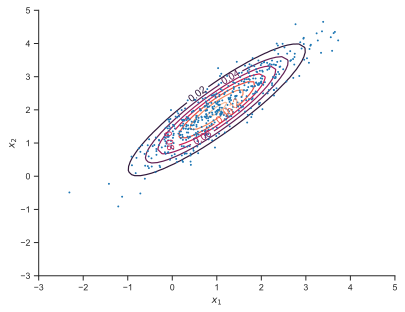

In [54]:
mu = np.array([1.0, 2.0])

Sigma = np.array(
    [
        [1.0, 0.9],
        [0.9, 1.0]
    ]
)

num_samples = 500
x_samples = sample_many_mvn(num_samples, mu, A)

x1 = np.linspace(-3, 5, 64)
x2 = np.linspace(-3, 5, 64)
X1, X2 = np.meshgrid(x1, x2)
X_flat = np.hstack(
    [
        X1.flatten()[:, None],
        X2.flatten()[:, None]
    ]
)
Z = vpdf_mvn(
        X_flat,
        mu,
        Sigma
).reshape(X1.shape)

fig, ax = plt.subplots()
c = ax.contour(X1, X2, Z)
ax.clabel(c, inline=1, fontsize=10)
ax.plot(
    x_samples[:, 0],
    x_samples[:, 1],
    '.',
    markersize=2
)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
sns.despine(trim=True)

Now, in practice you do not have to use the code above to sample from a multivariate normal.
Everything is already implemeneted in `scipy.stats`.
Here is what you can do:

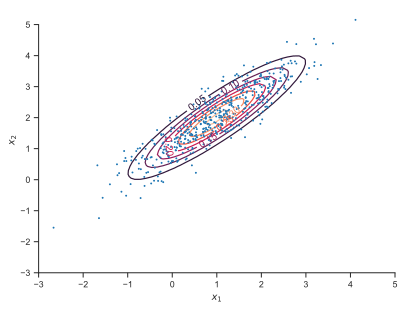

In [55]:
import scipy.stats as st

# A multivariate normal object
X = st.multivariate_normal(mu, Sigma)

# Evaluate the pdf
Z = X.pdf(X_flat).reshape(X1.shape)

# Take samples
x_samples = X.rvs(num_samples)

fig, ax = plt.subplots()
c = ax.contour(X1, X2, Z)
ax.clabel(c, inline=1, fontsize=10)
ax.plot(
    x_samples[:, 0],
    x_samples[:, 1],
    '.',
    markersize=2
)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
sns.despine(trim=True)

## Questions

+ Rerun the steps above after moving $\boldsymbol{\mu}$ to $(0, 1)$. Observe how the contours of the PDF move.
+ Rerun the steps above for $\Sigma_{12} = \Sigma_{21} = 0.1$. Observe how the contours of the PDF change.
+ Rerun the steps above for $\Sigma_{12} = \Sigma_{21} = -0.9$. Observe how the contours of the PDF change.